In [1]:
from dataloader import ImageDataLoader
from transforms import ImageTransform
import matplotlib.pyplot as plt
from model import Generator, Encoder
import torch
from config import model_path

In [2]:
device = 'cuda'
torch.cuda.is_available()

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


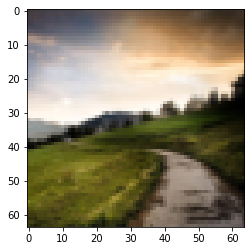

In [3]:
dataloader = ImageDataLoader().test_loader
image_transform = ImageTransform()
iterator = iter(dataloader)
raw_batch = iterator.next()
data = raw_batch[0].to(device)
image = raw_batch[0][0]
original_image = image_transform.denormalize(image)
plt.imshow(original_image.permute(1,2,0))

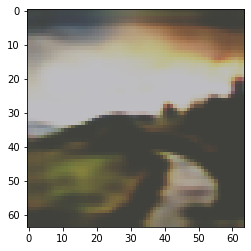

In [4]:
encoder = Encoder().to(device)
generator = Generator().to(device)

encoder.load_state_dict(torch.load(model_path + 'encoder.pth'))
generator.load_state_dict(torch.load(model_path + 'generator.pth'))

encoder.eval()
generator.eval()

encoded = encoder(data)
output = generator(encoded)
image_tensor = output[0].cpu()
image = image_tensor.detach()

generated_image = image_transform.denormalize(image)
plt.imshow(generated_image.permute(1,2,0))